# Import Library


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tq # untuk menampilkna bar progres saat proses iterasi

In [2]:
# Untuk menonaktifkan warinig yang mungkin muncul, seperti FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Menggunakan Google Colab
!nvidia-smi

Fri May 16 02:19:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Data Loading

In [4]:
df = pd.read_csv('housePrice_makassar_from_rumah123.csv')
df

Title    Lokasi  Jumlah Kamar Tidur  \
0                        Dekat Sekolah  Makassar                   4   
1                  Dekat Tempat Ibadah  Makassar                   5   
2                        Dekat Sekolah  Makassar                   4   
3                            Siap Huni  Makassar                   4   
4             Dekat Akses Transportasi  Makassar                   3   
..                                 ...       ...                 ...   
684                      Dekat Sekolah  Makassar                   4   
685  Rumah Singa Makassar Shm 11x 32 M  Makassar                   4   
686                          Siap Huni  Makassar                   3   
687                     Full Furnished  Makassar                   5   
688                      Dekat Sekolah  Makassar                   3   

     Jumlah Kamar Mandi  Luas Tanah  Luas Bangunan  Car Port        Price  \
0                     6         451            385         2  15000000000   
1                     5         425            368         2  10300000000   
2                     3         180            219         1   3130000000   
3                     3          92             72         2    988000000   
4                     2          82             72         2   1430000000   
..                  ...         ...            ...       ...          ...   
684                   4        1225            500         0  45000000000   
685                   4         325           1000         0      6700000   
686                   2          98             77         1         1700   
687                   5         180            234         1      2400000   
688                   4         112            172         2      1200000   

                      Timestamp  
0    2025-05-15 14:01:07.354294  
1    2025-05-15 14:01:07.354657  
2    2025-05-15 14:01:07.355030  
3    2025-05-15 14:01:07.355410  
4    2025-05-15 14:01:07.355772  
..                          ...  
684  2025-05-15 14:02:38.290250  
685  2025-05-15 14:02:38.290820  
686  2025-05-15 14:02:38.291156  
687  2025-05-15 14:02:38.291499  
688  2025-05-15 14:02:38.291834  

[689 rows x 9 columns]

# Exploratory Data Analysis

**Deskripsi Variabel**

- Title : Judul iklan yang diberikan kepada promotor.
- Lokasi : lokasi rumah yang ditawarkan.
- Jumlah Kamar Tidur : jumlah kamar tidur yang direpresentasikan dalam bentuk integer
- Jumlah Kamar Mandi : jumlah kamar mandi yang direpresentasikan dalam bentuk integer
- Luas Tanah : luas tanah yang direpresentasikan dalam satuan m²
- Luas Bangunan : luas bangunan yang direpresentasikan dalam satuan m²
- Car Port : merepresentasikan atau mengindikasikan tempat parkir beratap terbuka atau semi terbuka
- Price : Harga rumah
- Timestamp : waktu saat berhasil mendapatkan data dari hasil scraping

In [5]:
# Mengecek informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               689 non-null    object
 1   Lokasi              689 non-null    object
 2   Jumlah Kamar Tidur  689 non-null    int64 
 3   Jumlah Kamar Mandi  689 non-null    int64 
 4   Luas Tanah          689 non-null    int64 
 5   Luas Bangunan       689 non-null    int64 
 6   Car Port            689 non-null    int64 
 7   Price               689 non-null    int64 
 8   Timestamp           689 non-null    object
dtypes: int64(6), object(3)
memory usage: 48.6+ KB


In [6]:
# Mengecek deskripsi statistik
df.describe()

Jumlah Kamar Tidur  Jumlah Kamar Mandi    Luas Tanah  Luas Bangunan  \
count          689.000000          689.000000    689.000000     689.000000   
mean             4.150943            3.161103    240.251089     222.892598   
std              8.531091            5.548821   1071.994160     670.876072   
min              1.000000            1.000000      8.000000      15.000000   
25%              3.000000            2.000000     82.000000      72.000000   
50%              3.000000            3.000000    120.000000     120.000000   
75%              4.000000            4.000000    196.000000     203.000000   
max            200.000000          100.000000  22000.000000   13000.000000   

         Car Port         Price  
count  689.000000  6.890000e+02  
mean     0.937591  3.285353e+09  
std      0.847634  6.685606e+09  
min      0.000000  1.700000e+03  
25%      0.000000  9.000000e+08  
50%      1.000000  1.550000e+09  
75%      2.000000  3.150000e+09  
max      6.000000  8.300000e+10

In [7]:
df[df.Price == df.Price.min()]

Title    Lokasi  Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Tanah  \
686  Siap Huni  Makassar                   3                   2          98   

     Luas Bangunan  Car Port  Price                   Timestamp  
686             77         1   1700  2025-05-15 14:02:38.291156

In [8]:
df[df['Luas Tanah'] == df['Luas Tanah'].max()]

Title    Lokasi  Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Tanah  \
370  Subsidi  Makassar                 200                 100       22000   

     Luas Bangunan  Car Port        Price                   Timestamp  
370          10000         0  83000000000  2025-05-15 14:01:56.409373

In [9]:
df[df['Luas Bangunan'] == df['Luas Bangunan'].max()]

Title    Lokasi  \
157  Rumah 2 Lantai, Citraland Celebes Makassar, SH...  Makassar   

     Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Tanah  Luas Bangunan  \
157                   3                   3       16200          13000   

     Car Port       Price                   Timestamp  
157         2  3150000000  2025-05-15 14:01:26.082342

In [10]:
df[df['Jumlah Kamar Mandi'] == df['Jumlah Kamar Mandi'].max()]

Title    Lokasi  Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Tanah  \
370  Subsidi  Makassar                 200                 100       22000   

     Luas Bangunan  Car Port        Price                   Timestamp  
370          10000         0  83000000000  2025-05-15 14:01:56.409373

In [11]:
df[df['Jumlah Kamar Tidur'] == df['Jumlah Kamar Tidur'].max()]

Title    Lokasi  Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Tanah  \
370  Subsidi  Makassar                 200                 100       22000   

     Luas Bangunan  Car Port        Price                   Timestamp  
370          10000         0  83000000000  2025-05-15 14:01:56.409373

## Mengecek Outliers

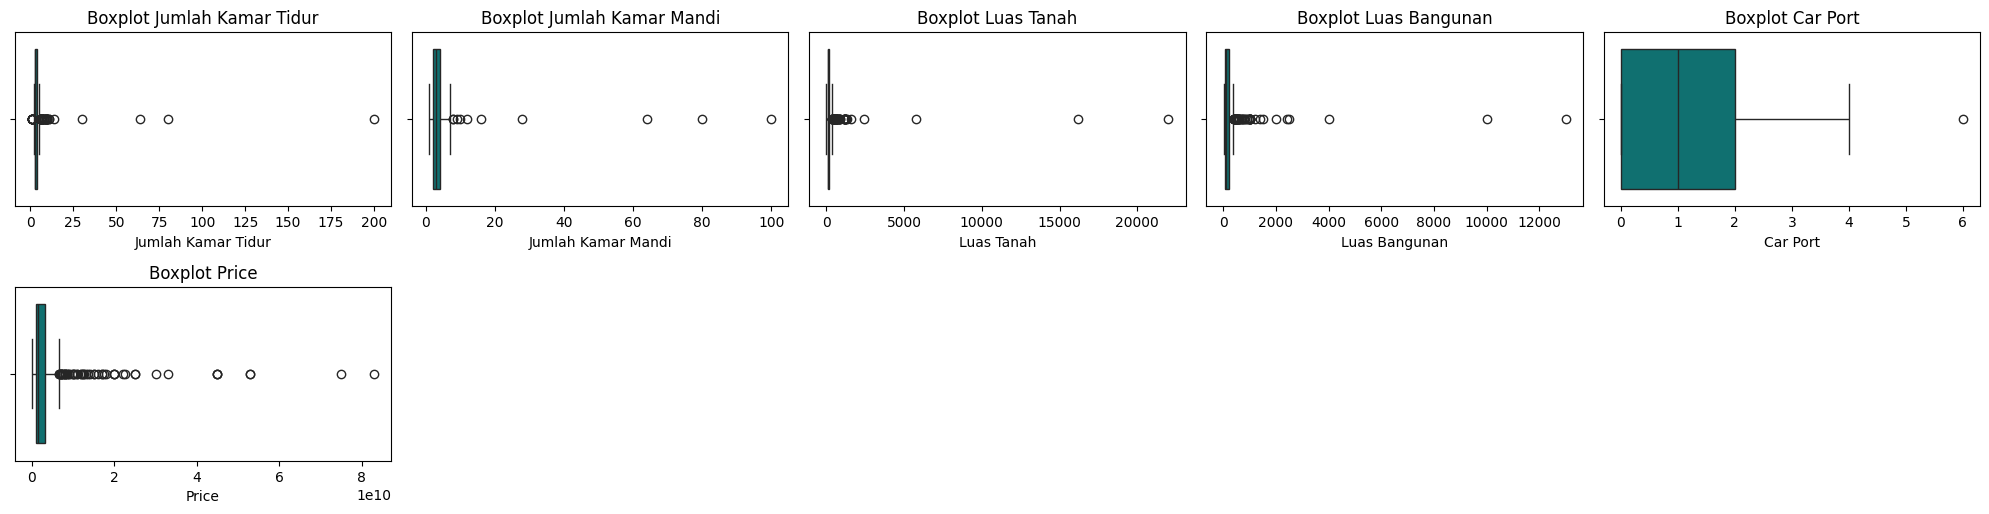

In [12]:
# Mengecek ouliers

numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(20, 15))

for i, (label, data) in enumerate(numeric_cols.items(), 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=data, color='teal')
    plt.title(f"Boxplot {label}")
    plt.xlabel(label)

plt.tight_layout()
plt.show()

Outliers merupakan data anomali seperti yang ada pada poin pertama. kali ini kita melakukan visualisasi menggunakan boxplot

## Univariate Analysis

### Numerical Features

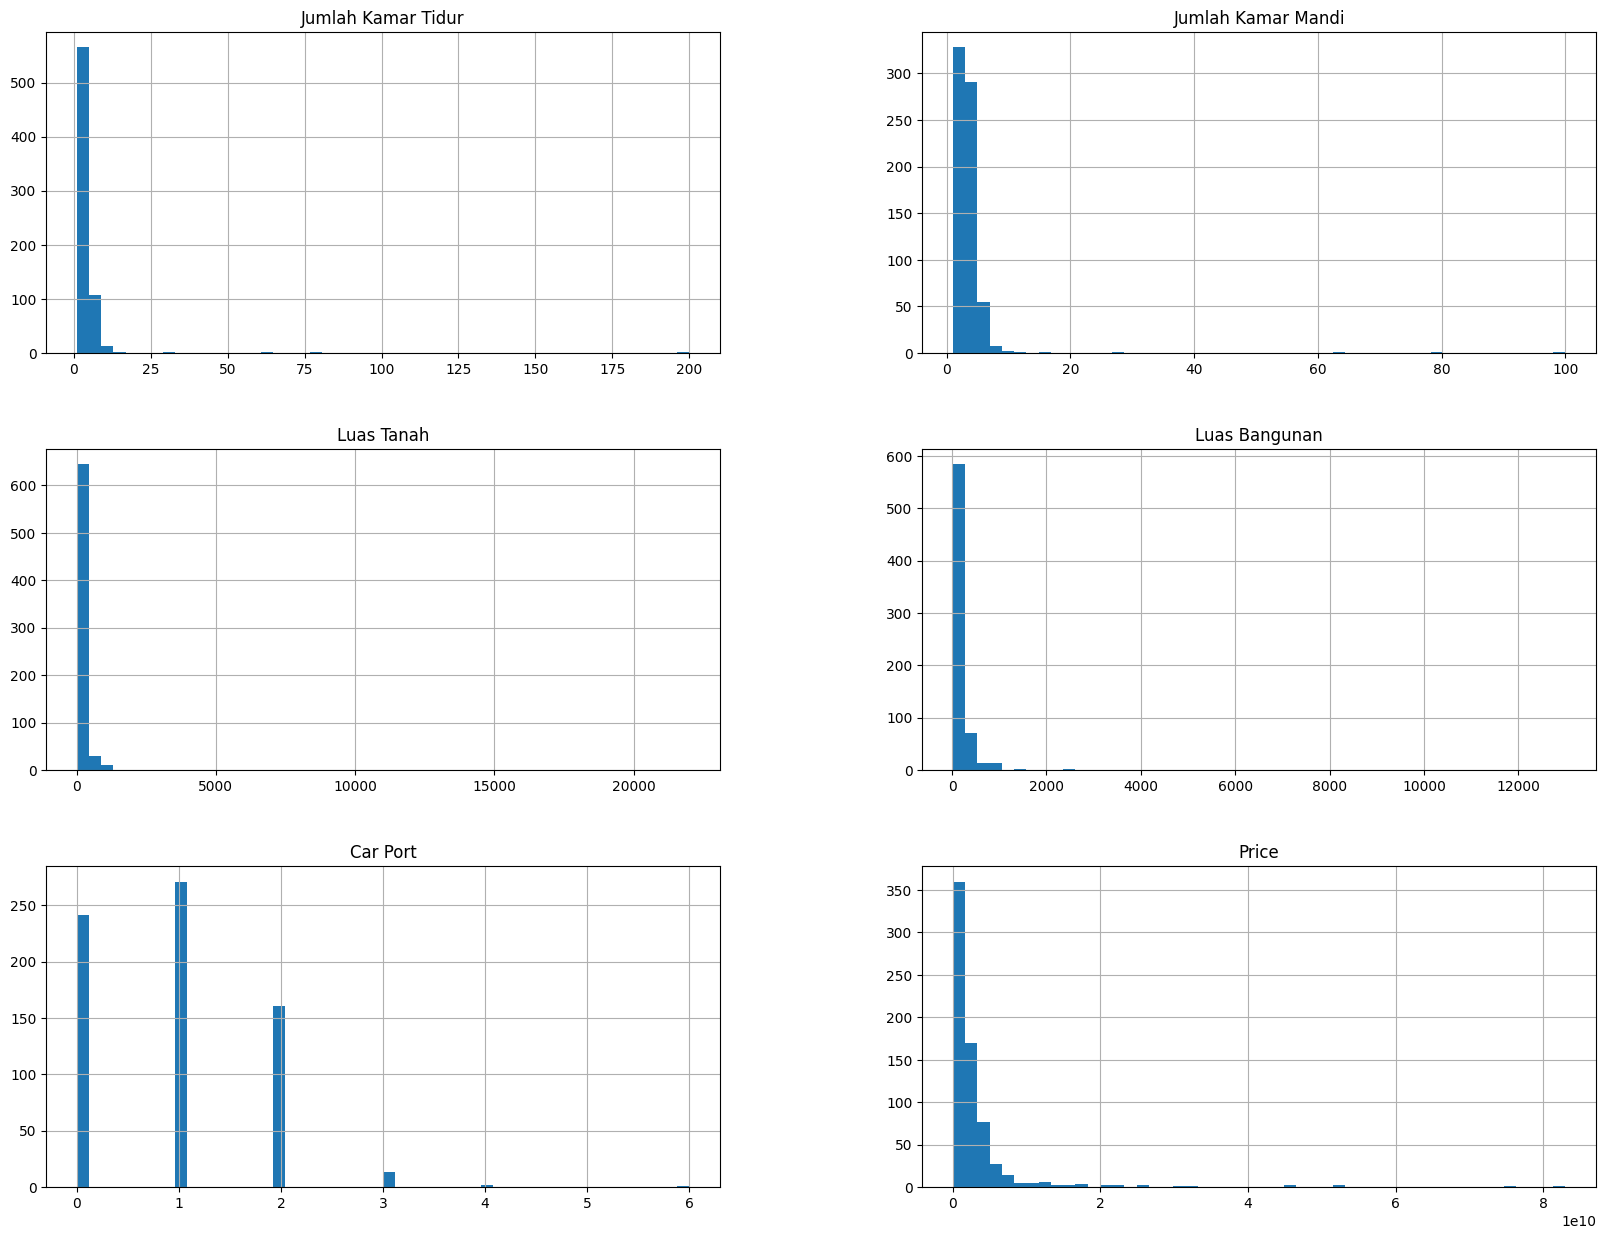

In [13]:
# Menghitung histogram
df.hist(bins=50, figsize=(20, 15))
plt.show()

Sebagian besar fitur memiliki distribusi skewed ke kanan. banyak outlier yang berpotensi mengganggu peforma model

### Multivariate Analysis

### Numerical Features

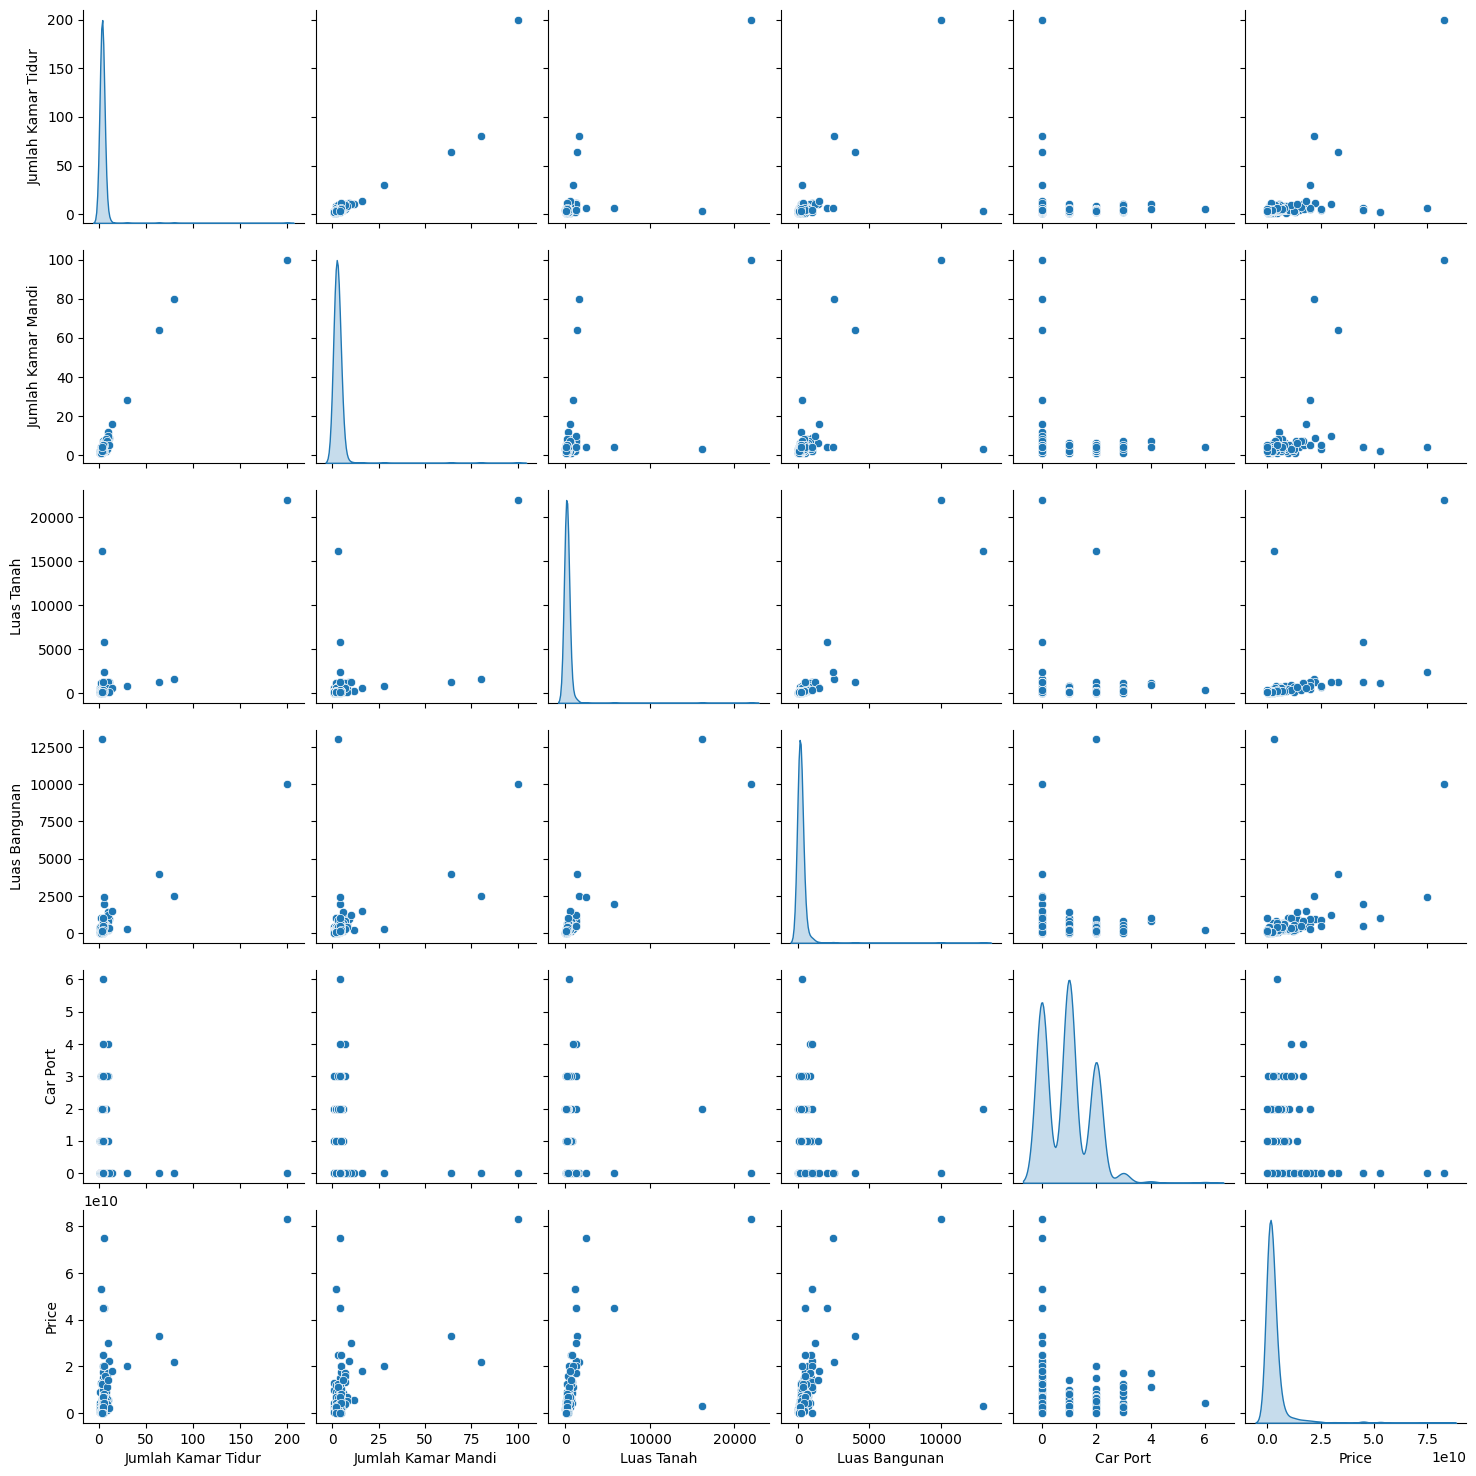

In [14]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind='kde')
plt.show()

Fitur 'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi', 'Luas Tanah', 'Luas Bangunan' memiliki korelasi terhadap 'Price' walaupun sedikit lemah dikarenakan masih banyak outliers.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

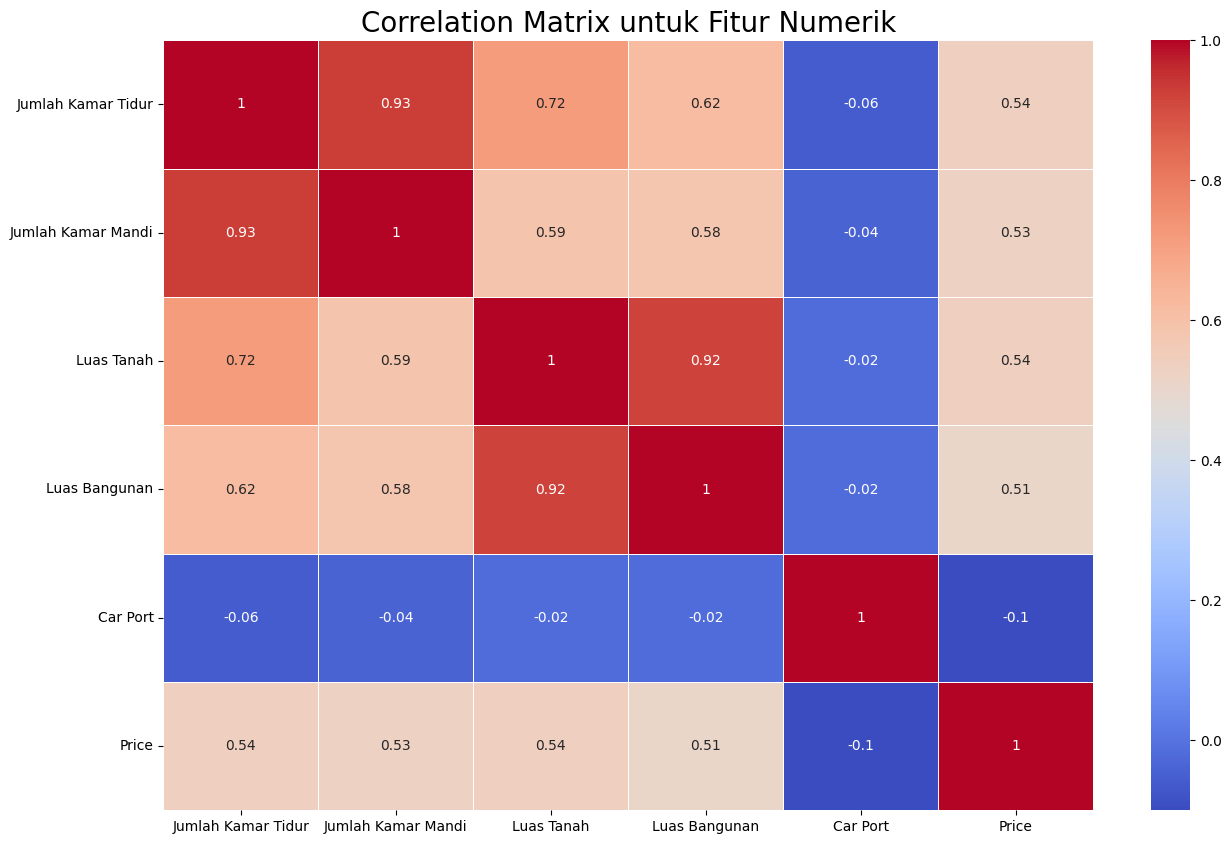

In [15]:
# mengevaluasi skor korelasi

plt.figure(figsize=(15, 10))
correlation_matrix = df[numeric_cols.columns].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

Dapat dilihat 'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi', 'Luas Tanah', 'Luas Bangunan' memiliki angka mendekati 1 terhadap 'Price' yang mengindikasikan adanya korelasi terhadap fitur tersebut.

# Data Preparation

## Menangani Outliers

In [16]:
# Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(573, 9)

In [17]:
df.describe()

Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Tanah  Luas Bangunan  \
count          573.000000          573.000000  573.000000     573.000000   
mean             3.308901            2.511344  121.450262     122.045375   
std              0.900975            1.083229   57.431197      68.725521   
min              2.000000            1.000000    8.000000      15.000000   
25%              3.000000            2.000000   78.000000      70.000000   
50%              3.000000            2.000000  105.000000     100.000000   
75%              4.000000            3.000000  151.000000     164.000000   
max              5.000000            6.000000  327.000000     385.000000   

         Car Port         Price  
count  573.000000  5.730000e+02  
mean     0.987784  1.785203e+09  
std      0.776529  1.264438e+09  
min      0.000000  1.700000e+03  
25%      0.000000  8.000000e+08  
50%      1.000000  1.300000e+09  
75%      2.000000  2.500000e+09  
max      3.000000  6.500000e+09

## Innaccurate Data

In [18]:
# Hitung rata-rata Price
mean_price = df['Price'].mean()

# Dapatkan indeks dari baris dengan nilai Price minimum
min_price_index = df[df['Price'] == df['Price'].min()].index[0]

# Imputasi nilai Price terendah dengan rata-rata
df.loc[min_price_index, 'Price'] = mean_price

In [19]:
df.describe()

Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Tanah  Luas Bangunan  \
count          573.000000          573.000000  573.000000     573.000000   
mean             3.308901            2.511344  121.450262     122.045375   
std              0.900975            1.083229   57.431197      68.725521   
min              2.000000            1.000000    8.000000      15.000000   
25%              3.000000            2.000000   78.000000      70.000000   
50%              3.000000            2.000000  105.000000     100.000000   
75%              4.000000            3.000000  151.000000     164.000000   
max              5.000000            6.000000  327.000000     385.000000   

         Car Port         Price  
count  573.000000  5.730000e+02  
mean     0.987784  1.788319e+09  
std      0.776529  1.262229e+09  
min      0.000000  1.200000e+06  
25%      0.000000  8.070000e+08  
50%      1.000000  1.300000e+09  
75%      2.000000  2.500000e+09  
max      3.000000  6.500000e+09

## Split Dataset

In [20]:
drop_cols = ['Price', 'Timestamp', 'Title', 'Lokasi',]
X = df.drop(drop_cols, axis=1)
y = df['Price']

In [21]:
# Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standarisasi

In [22]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

numerical_features = ['Jumlah Kamar Tidur', 'Jumlah Kamar Mandi', 'Luas Bangunan', 'Luas Tanah', 'Car Port']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Bangunan  Luas Tanah  \
215            0.794859           -0.456566      -0.027911    0.899013   
78            -0.318430            0.460571       0.559141   -0.036497   
184           -0.318430           -0.456566      -0.908488   -0.954356   
75            -0.318430           -0.456566      -0.027911   -0.283613   
20             1.908147           -0.456566       0.324320    0.404781   

     Car Port  
215 -1.245267  
78  -1.245267  
184  0.039265  
75  -1.245267  
20  -1.245267

In [23]:
X_train[numerical_features].describe().round(4)

Jumlah Kamar Tidur  Jumlah Kamar Mandi  Luas Bangunan  Luas Tanah  \
count            458.0000            458.0000       458.0000    458.0000   
mean              -0.0000             -0.0000         0.0000     -0.0000   
std                1.0011              1.0011         1.0011      1.0011   
min               -1.4317             -1.3737        -1.5689     -1.9958   
25%               -0.3184             -0.4566        -0.7617     -0.7602   
50%               -0.3184             -0.4566        -0.3214     -0.2836   
75%                0.7949              0.4606         0.6289      0.5107   
max                1.9081              3.2120         3.8613      3.5996   

       Car Port  
count  458.0000  
mean    -0.0000  
std      1.0011  
min     -1.2453  
25%     -1.2453  
50%      0.0393  
75%      1.3238  
max      2.6083

# Model Development

In [24]:
# siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [25]:
# Melatih model knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [26]:
# Melatih model random forest
from sklearn.ensemble import RandomForestRegressor

# Buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)



In [27]:
# Melatih model boosting
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)


# Evaluasi Model

In [28]:
# Scaling terhadap fitur numerik pada X_test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [29]:
# Buat variabel mse yang isinya adalah datafram nilai mse data train dan test pada masing masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF':RF, 'Boosting':boosting}

# Hitung MSE masing masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# panggil mse
mse

train                  test
KNN       448901894884910.5625  554788502191846.9375
RF        67653514347238.15625   452829266572848.125
Boosting  407936590385242.4375     527673229781362.0

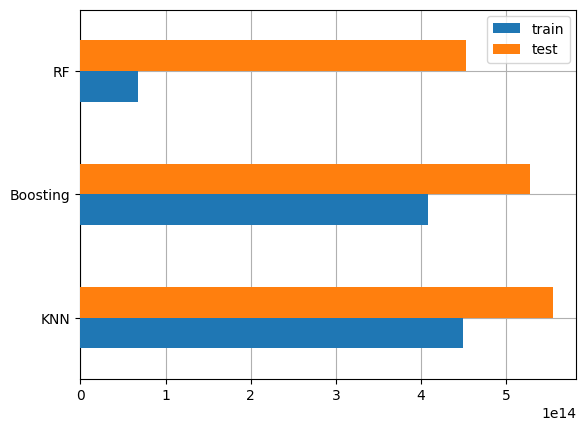

In [30]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [31]:
# Menguji perdiksi
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

y_true  prediksi_KNN   prediksi_RF  prediksi_Boosting
614  4.000000e+09  4.086000e+09  4.426600e+09       4.023857e+09

In [32]:
# Menguji prediksi untuk seluruh data X_test
prediksi = X_test.copy()
pred_dict = {'y_true': y_test}

for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

# Hasil prediksi dalam bentuk DataFrame
hasil_prediksi = pd.DataFrame(pred_dict)
hasil_prediksi.head()  # Tampilkan 5 baris pertama (opsional)

y_true  prediksi_KNN   prediksi_RF  prediksi_Boosting
614  4.000000e+09  4.086000e+09  4.426600e+09       4.023857e+09
85   2.500000e+09  1.743800e+09  2.057200e+09       2.016338e+09
155  1.150000e+09  2.037000e+09  1.737672e+09       2.073857e+09
488  9.000000e+08  1.371800e+09  1.264820e+09       1.011040e+09
651  2.200000e+09  2.007000e+09  1.897800e+09       2.051460e+09